Построим двумя способами доверительные интервалы для дисперсии нормального распределения, когда математическое ожидание известно (будем считать, что оно равно нулю).

1) С помощью статистики $\sum X^2_k/n$ получаем интервал $( \sum X^2_k/\lambda_{(1 + \gamma)/2},  \sum X^2_k/\lambda_{(1 - \gamma)/2}),$
		
где $\lambda_p$ $-$ квантиль порядка $p$ распределения хи-квадрат с $n$ степенями свободы.
		
2) С помощью статистики $(\sum X_k/n)^2$ получаем интервал
$( n\overline{X}^2/z^2_{(3 + \gamma)/4},  n\overline{X}^2/z^2_{(3 - \gamma)/4}),$

где $z_p$ $-$ квантиль порядка $p$ стандартного нормального распределения.

Численно исследуйте поведение этих доверительных интервалов при увеличении объема выборки.

In [16]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [84]:
def conf_int(std, gamma, N):
    c_i_1, c_i_2 = [], []

    for n in range(1, N):
        X = np.random.normal(0, std, n)

        lambda_1 = scipy.stats.chi2.ppf((1 + gamma) / 2, n)
        lambda_2 = scipy.stats.chi2.ppf((1 - gamma) / 2, n)
        z_1 = scipy.stats.norm.ppf((3 + gamma) / 4, loc=0, scale=1)
        z_2 = scipy.stats.norm.ppf((3 - gamma) / 4, loc=0, scale=1)

        l1 = np.sum(X ** 2)/lambda_1
        r1 = np.sum(X ** 2)/lambda_2 
        l2 = n * (np.mean(X) ** 2) / (z_1 ** 2)
        r2 = n * (np.mean(X) ** 2) / (z_2 ** 2)

        c_i_1.append(r1 - l1)
        c_i_2.append(r2 - l2)
    return  c_i_1, c_i_2   

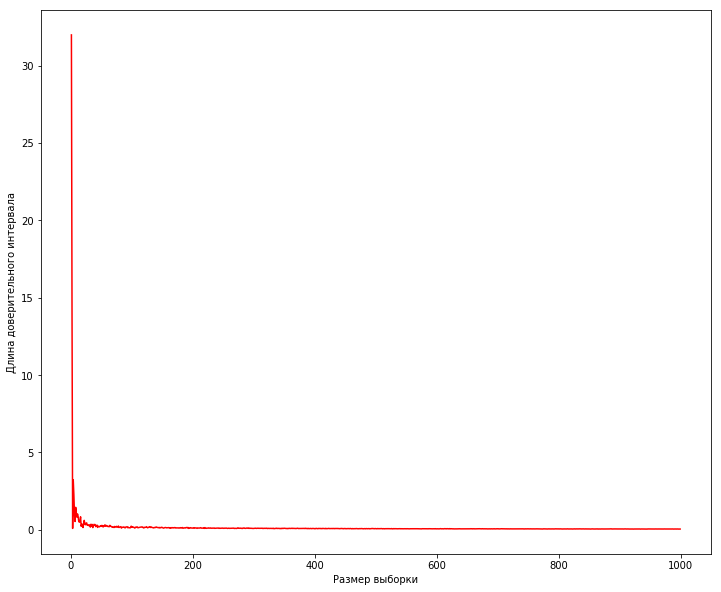

In [85]:
std = 0.6
gamma = 0.9
N = 1000
c_i_1, c_i_2 = conf_int(std, gamma, N)
x_f = [i for i in np.arange(1, N, 1)]
plt.figure(figsize = (12, 10))
plt.plot(x_f, c_i_1, 'r')
plt.xlabel("Размер выборки")
plt.ylabel("Длина доверительного интервала")
plt.show()

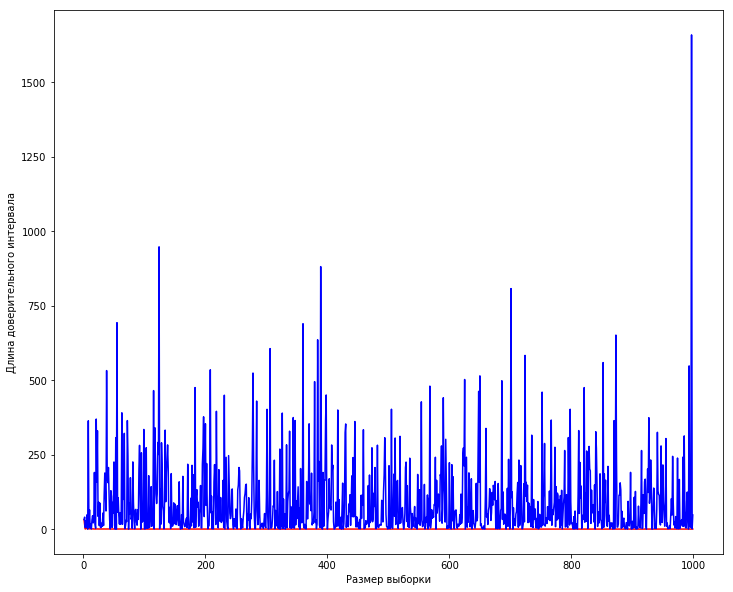

In [86]:
plt.figure(figsize = (12, 10))
plt.plot(x_f, c_i_1, 'r') #с помощью первой статистики
plt.xlabel("Размер выборки")
plt.ylabel("Длина доверительного интервала")
plt.plot(x_f, c_i_2, 'b') #с помощью второй статистики
plt.show()

Заметим, что в первом случае длина доверительного интервала постепенно уменьшается с увеличением размера выборки и стремится к нулю, а во втором случае происходит что-то странное. Вторым способом оценивать дисперсию не надо.